**Explore this notebook for similar EDA**

https://www.kaggle.com/kmalit/bank-customer-churn-prediction


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") #from Keggle
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# Searcing for all the unique values in each column 
def print_unique_obj_col_values(df):
        for column in df:
            if df[column].dtype == object :
                print (f'{column}: {df[column].unique()}')
                
print_unique_obj_col_values(df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


### EDA checklist

- drop customerID
- convert all numeric values to float
- marge redundent values into one group of data in each col
- convert all catagorical data to neumerical 
- scale all neumerical data (using minmax scaler)

In [5]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

### The error is due to whitespaces in the object  data, white space can't be converted into float.
### From the error,we can see there's a empty space on 488th row

In [8]:
#Dropping all the null

df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

#The argument errors='coerce' ensures non-convertible values are replaced by NaN.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.TotalCharges.dtype

dtype('O')

In [10]:
df.shape

(7043, 20)

In [11]:
df.iloc[488]["TotalCharges"]

' '

In [12]:
#Copying the ones without whitespace 

df1=df[df.TotalCharges != ' ']

In [13]:
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)
df1.dtypes

/home/arian/.local/lib/python3.8/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
#Tenure == how many months they have been using the service
tenure_churn_no = df1[df1.Churn=="No"].tenure #ones not leaving
tenure_churn_yes = df1[df1.Churn=="Yes"].tenure


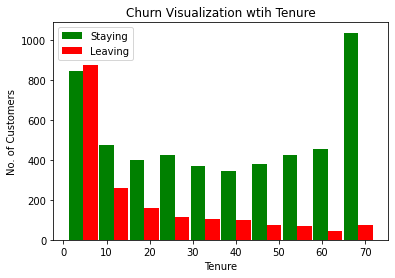

In [17]:
plt.xlabel("Tenure")
plt.ylabel("No. of Customers")
plt.title("Churn Visualization wtih Tenure")

plt.hist([tenure_churn_no, tenure_churn_yes] , rwidth=0.95,color=['green','red'],label=['Staying','Leaving'])
plt.legend() #otherwie the labels won't show

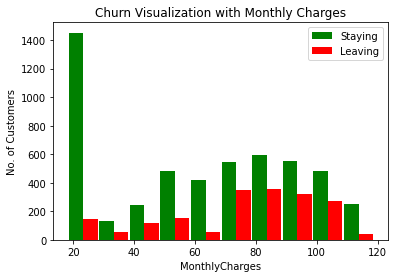

In [18]:
monthly_churn_no = df1[df1.Churn=="No"].MonthlyCharges #ones not leaving
monthly_churn_yes = df1[df1.Churn=="Yes"].MonthlyCharges


plt.xlabel("MonthlyCharges")
plt.ylabel("No. of Customers")
plt.title("Churn Visualization with Monthly Charges")

plt.hist([monthly_churn_no,monthly_churn_yes] , rwidth=0.95,color=['green','red'],label=['Staying','Leaving'])
plt.legend() #otherwie the labels won't show

In [19]:
print_unique_obj_col_values(df1)
df1.dtypes

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [20]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)

print_unique_obj_col_values(df1)

df1.dtypes

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


/home/arian/.local/lib/python3.8/site-packages/pandas/core/frame.py:4378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [21]:
#Collecting  object Col names for one hot encoding

columns_for_onehot=[]
for column in df1:
        if df1[column].dtype == object :
            columns_for_onehot.append(column)
                
print(columns_for_onehot)

type(columns_for_onehot)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


list

In [22]:
for col in columns_for_onehot:
        print(col)
        print(df1[col].unique())
        df1[col].replace({"Yes":1,'No':0},inplace=True)
       # df1[col].replace({"Male":1,'Female':0},inplace=True)

gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes']
OnlineBackup
['Yes' 'No']
DeviceProtection
['No' 'Yes']
TechSupport
['No' 'Yes']
StreamingTV
['No' 'Yes']
StreamingMovies
['No' 'Yes']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


/home/arian/.local/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### Ignore this error , this is due to setting inplace to true and running it again .

In [23]:
print_unique_obj_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 0]
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [24]:
for col in df1:
    print (f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [29]:
df1["gender"].replace({'Male':0,'Female':1},inplace=True)

In [30]:
for col in df1:
    print (f'{col}: {df1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [38]:
#One hot encoding

df2 = pd.get_dummies(data=df1,columns=["InternetService","Contract","PaymentMethod"])

list(df2.columns)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'InternetService_0',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [40]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [43]:
df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2801,1,0,1,1,62,1,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4518,0,1,0,0,8,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [48]:
#scaling the neumeric values


cols_to_scale=["tenure",'TotalCharges','MonthlyCharges']


from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])



In [51]:
for col in df2:
    print (f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [ ]:
# Model training

In [53]:
x= df2.drop('Churn',axis='columns')
y=df2["Churn"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)

In [56]:
x_train.shape

(5625, 26)

In [82]:
import tensorflow as tf
from tensorflow import keras

model= keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='LeakyReLU'),#giving col number of neurons in first layer
    keras.layers.Dense(15,activation='LeakyReLU'),
    keras.layers.Dense(1,activation='sigmoid')
    #used sigmoid on the last as our output is binary 
])

model.compile(optimizer='adam',
             loss="binary_crossentropy", #since expecting binary output
             metrics=["accuracy"])


In [84]:
model.fit(x_train,y_train,epochs=250,verbose=2)

Epoch 1/250
176/176 - 0s - loss: 0.3241 - accuracy: 0.8501
Epoch 2/250
176/176 - 0s - loss: 0.3245 - accuracy: 0.8516
Epoch 3/250
176/176 - 0s - loss: 0.3223 - accuracy: 0.8523
Epoch 4/250
176/176 - 0s - loss: 0.3218 - accuracy: 0.8496
Epoch 5/250
176/176 - 0s - loss: 0.3232 - accuracy: 0.8492
Epoch 6/250
176/176 - 0s - loss: 0.3219 - accuracy: 0.8535
Epoch 7/250
176/176 - 0s - loss: 0.3240 - accuracy: 0.8516
Epoch 8/250
176/176 - 0s - loss: 0.3233 - accuracy: 0.8500
Epoch 9/250
176/176 - 0s - loss: 0.3222 - accuracy: 0.8505
Epoch 10/250
176/176 - 0s - loss: 0.3209 - accuracy: 0.8519
Epoch 11/250
176/176 - 0s - loss: 0.3225 - accuracy: 0.8484
Epoch 12/250
176/176 - 0s - loss: 0.3233 - accuracy: 0.8521
Epoch 13/250
176/176 - 0s - loss: 0.3214 - accuracy: 0.8517
Epoch 14/250
176/176 - 0s - loss: 0.3218 - accuracy: 0.8528
Epoch 15/250
176/176 - 0s - loss: 0.3229 - accuracy: 0.8489
Epoch 16/250
176/176 - 0s - loss: 0.3232 - accuracy: 0.8500
Epoch 17/250
176/176 - 0s - loss: 0.3189 - accura

176/176 - 0s - loss: 0.3099 - accuracy: 0.8580
Epoch 138/250
176/176 - 0s - loss: 0.3140 - accuracy: 0.8519
Epoch 139/250
176/176 - 0s - loss: 0.3104 - accuracy: 0.8581
Epoch 140/250
176/176 - 0s - loss: 0.3080 - accuracy: 0.8603
Epoch 141/250
176/176 - 0s - loss: 0.3092 - accuracy: 0.8555
Epoch 142/250
176/176 - 0s - loss: 0.3084 - accuracy: 0.8574
Epoch 143/250
176/176 - 0s - loss: 0.3108 - accuracy: 0.8588
Epoch 144/250
176/176 - 0s - loss: 0.3092 - accuracy: 0.8580
Epoch 145/250
176/176 - 0s - loss: 0.3066 - accuracy: 0.8594
Epoch 146/250
176/176 - 0s - loss: 0.3095 - accuracy: 0.8576
Epoch 147/250
176/176 - 0s - loss: 0.3089 - accuracy: 0.8564
Epoch 148/250
176/176 - 0s - loss: 0.3084 - accuracy: 0.8560
Epoch 149/250
176/176 - 0s - loss: 0.3069 - accuracy: 0.8555
Epoch 150/250
176/176 - 0s - loss: 0.3061 - accuracy: 0.8596
Epoch 151/250
176/176 - 0s - loss: 0.3088 - accuracy: 0.8569
Epoch 152/250
176/176 - 0s - loss: 0.3102 - accuracy: 0.8606
Epoch 153/250
176/176 - 0s - loss: 0.3

In [138]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 699us/step - loss: 0.5661 - accuracy: 0.7690


[0.5661266446113586, 0.7690120935440063]

In [139]:
#Storing the predictions in a  list

y_preditct = model.predict(x_test)
y_predict2=np.round(y_preditct)
y_predict3= y_predict2.tolist()

In [140]:
y_predict3[:10]

[[1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0], [0.0]]

In [141]:
print(f"First 10 values \n",y_test[:10])
print(f"First 10 Predicted values \n",y_predict3[:10])

First 10 values 
 3536    0
5804    0
3295    0
3541    0
490     0
4804    0
1604    0
6516    1
3681    1
2826    0
Name: Churn, dtype: int64
First 10 Predicted values 
 [[1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0], [0.0]]


In [142]:
y_test.dtype

dtype('int64')

In [143]:
#classification report


In [145]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.57      0.51      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'Actual')

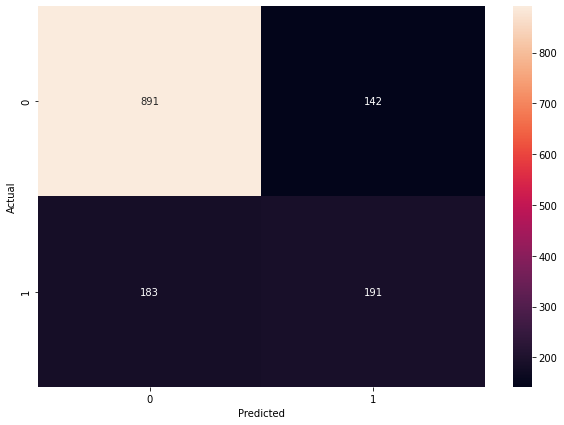

In [147]:
import seaborn as sns 
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_predict3)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [154]:
Accuracy = (891+191) / (891+191+142+183)
round(Accuracy,3)

0.769

In [160]:
# Precision for 1 
# how many of the leaving customers model got right, out of all leaving ones

Precision1 = 191/ (191+142)

round(Precision1,3)


0.574

In [161]:
#Precison for 0

Precision0 = 891/ (891+183)

round(Precision0,3)

0.83

In [163]:
#Recall for 0
#How many we said are not leaving vs how many are actually not leaving

Recall0= 891/(891+142)

round(Recall0,3)

0.863

In [164]:
#Recall for 1

Recall1= 191/(191+183)

round(Recall1,3)

0.511